In [1]:
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [2]:
from src.utils import *

# Generate data

/Users/Mohammad/Documents/ds-projects/deg-predict-demo/degradation-transformer/src/utils.py:49: RuntimeWarning: overflow encountered in power
  return self.c * a ** (self.m/2)


(np.float64(0.005754252417899286), np.float64(14.992487813219306), (1426, 100))

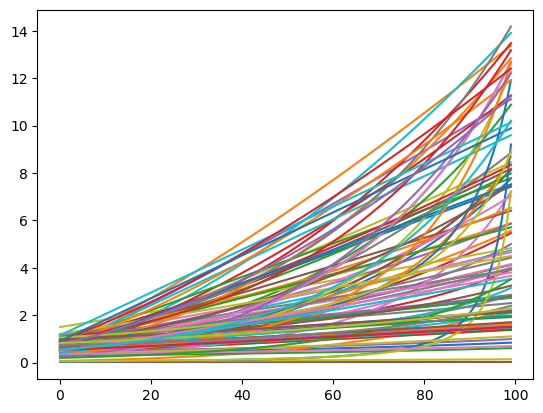

In [3]:
length = 100
n0 = 30
paris_episodes = np.empty((0, length))
for c in np.arange(0.01, .1, .02):
    for m in np.arange(0.01, 4, .2):
        paris = ParisLawDegradation(length=length, dim=1, c=c, m=m)
        episodes_i = paris.generate_episode(x0=np.abs(np.random.randn(n0)*0.3+0.7))  # Initial crack lengths in meters
        paris_episodes = np.concatenate([paris_episodes, episodes_i], axis=0)

#drop invalid values
paris_episodes = paris_episodes[~np.isnan(paris_episodes).any(axis=1)]
paris_episodes = paris_episodes[(paris_episodes<15).all(axis=1)]
paris_episodes = paris_episodes[(paris_episodes>=0).all(axis=1)]

paris_episodes.shape
# plot 20 random episodes
plt.plot(paris_episodes[np.random.randint(0, paris_episodes.shape[0], size=100)].T)
paris_episodes.min(), paris_episodes.max(), paris_episodes.shape

In [4]:
np.arange(0, 2, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

(np.float64(0.00883623543753076), np.float64(11.882482950813392), (1500, 100))

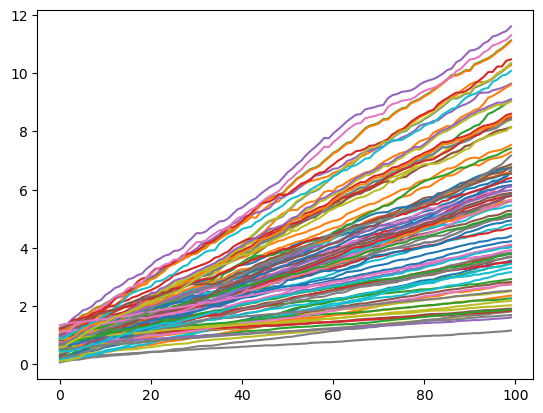

In [5]:
lin_episodes = np.empty((0, length))
for c in np.linspace(0.01, 0.1, 50):
    
    lin = LinearDegradation(length=length, dim=1, c=c, mu_e=0, sigma_e=c/2)
    episodes_i = lin.generate_episode(x0=np.abs(np.random.randn(n0)*0.3+0.7))  # Initial crack lengths in meters
    lin_episodes = np.concatenate([lin_episodes, episodes_i], axis=0)

#drop invalid values
lin_episodes = lin_episodes[~np.isnan(lin_episodes).any(axis=1)]
lin_episodes = lin_episodes[(lin_episodes<15).all(axis=1)]
lin_episodes = lin_episodes[(lin_episodes>=0).all(axis=1)]

# plot 20 random episodes
plt.plot(lin_episodes[np.random.randint(0, lin_episodes.shape[0], size=100)].T)
lin_episodes.min(), lin_episodes.max(), lin_episodes.shape

In [6]:
np.linspace(2, 7, 5)

array([2.  , 3.25, 4.5 , 5.75, 7.  ])

(np.float64(0.02499245495333602), np.float64(14.714465190847767), (720, 100))

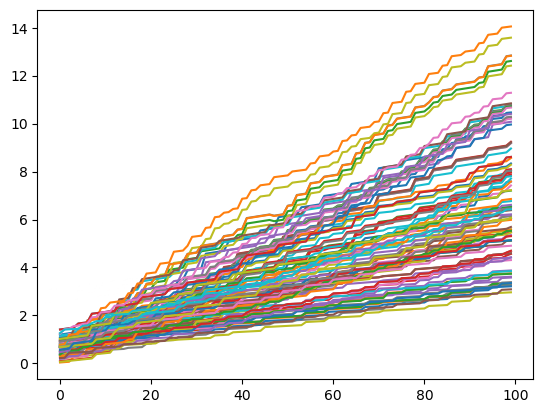

In [7]:
shock_episodes = np.empty((0, length))
for mu_t in range(2, 7):
    for mu_shock in np.linspace(0.1, 0.3, 5):
        shock = RandomShockDegradation(length=length, dim=1, 
                                       mu_t=mu_t, sigma_t=mu_t/3, 
                                       mu_shock=mu_shock, sigma_shock=mu_shock/3, 
                                       baseline=mu_shock/10)
        
        episodes_i = shock.generate_episode(x0=np.abs(np.random.randn(n0)*0.3+0.7))  # Initial crack lengths in meters
        shock_episodes = np.concatenate([shock_episodes, episodes_i], axis=0)

#drop invalid values
shock_episodes = shock_episodes[~np.isnan(shock_episodes).any(axis=1)]
shock_episodes = shock_episodes[(shock_episodes<15).all(axis=1)]
shock_episodes = shock_episodes[(shock_episodes>=0).all(axis=1)]

shock_episodes.shape
# plot 20 random episodes
plt.plot(shock_episodes[np.random.randint(0, shock_episodes.shape[0], size=100)].T)
shock_episodes.min(), shock_episodes.max(), shock_episodes.shape

(np.float64(0.026865072830305814), np.float64(14.982752441586895), (1617, 100))

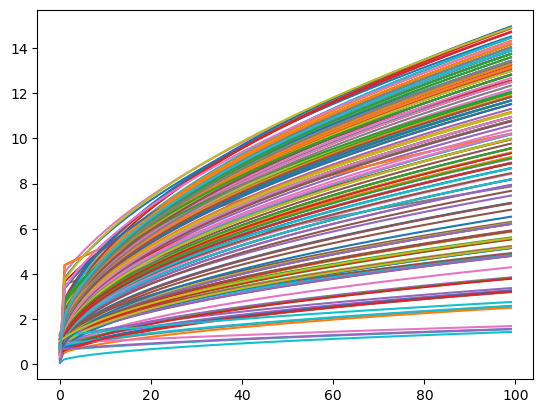

In [8]:
sei_episodes = np.empty((0, length))
for k in np.linspace(0.01, 2, 100):
    
    sei = SEILayer(length=length, dim=1, k=k)
    
    episodes_i = sei.generate_episode(x0=np.abs(np.random.randn(n0)*0.3+0.7))  # Initial crack lengths in meters
    sei_episodes = np.concatenate([sei_episodes, episodes_i], axis=0)

#drop invalid values
sei_episodes = sei_episodes[~np.isnan(sei_episodes).any(axis=1)]
sei_episodes = sei_episodes[(sei_episodes<15).all(axis=1)]
sei_episodes = sei_episodes[(sei_episodes>=0).all(axis=1)]

sei_episodes.shape
# plot 20 random episodes
plt.plot(sei_episodes[np.random.randint(0, sei_episodes.shape[0], size=200)].T)
sei_episodes.min(), sei_episodes.max(), sei_episodes.shape

(np.float64(0.012311230561790953), np.float64(14.999999999999998), (1200, 100))

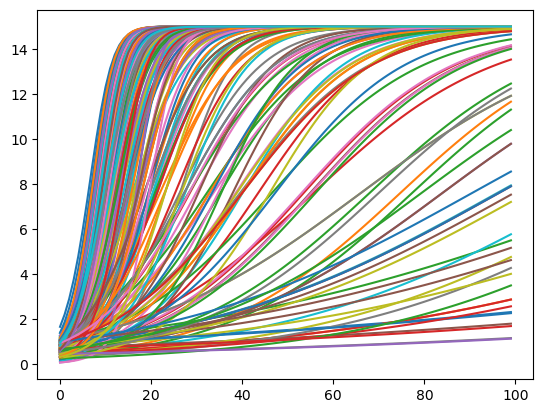

In [9]:
logistic_episodes = np.empty((0, length))
for alfa in np.linspace(0.01, .4, 40):
    
    logstiff = LogisticStiffness(length=length, dim=1, alfa=alfa, xmax=15)
    
    episodes_i = logstiff.generate_episode(x0=np.abs(np.random.randn(n0)*0.3+0.7))  # Initial crack lengths in meters
    logistic_episodes = np.concatenate([logistic_episodes, episodes_i], axis=0)

#drop invalid values
logistic_episodes = logistic_episodes[~np.isnan(logistic_episodes).any(axis=1)]
logistic_episodes = logistic_episodes[(logistic_episodes<15).all(axis=1)]
logistic_episodes = logistic_episodes[(logistic_episodes>=0).all(axis=1)]

logistic_episodes.shape
# plot 20 random episodes
plt.plot(logistic_episodes[np.random.randint(0, logistic_episodes.shape[0], size=200)].T)
logistic_episodes.min(), logistic_episodes.max(), logistic_episodes.shape

(np.float64(0.0037612603035895864),
 np.float64(14.844832206044774),
 (1554, 100))

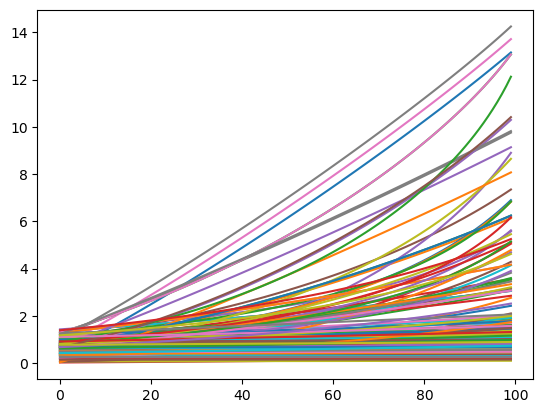

In [ ]:
loglogistic_episodes = np.empty((0, length))
for beta in np.linspace(0.01, .3, 8):
    for k in np.linspace(-0.9, .9, 8):
    
        logstiff = LogLogisticStiffness(length=length, dim=1, alfa=15, beta=beta, k=k, sigma_e=beta)
        
        episodes_i = logstiff.generate_episode(x0=np.abs(np.random.randn(n0)*0.3+0.7))  # Initial crack lengths in meters
        loglogistic_episodes = np.concatenate([loglogistic_episodes, episodes_i], axis=0)

#drop invalid values
loglogistic_episodes = loglogistic_episodes[~np.isnan(loglogistic_episodes).any(axis=1)]
loglogistic_episodes = loglogistic_episodes[(loglogistic_episodes<15).all(axis=1)]
loglogistic_episodes = loglogistic_episodes[(loglogistic_episodes>=0).all(axis=1)]

loglogistic_episodes.shape
# plot 20 random episodes
plt.plot(loglogistic_episodes[np.random.randint(0, loglogistic_episodes.shape[0], size=200)].T)
loglogistic_episodes.min(), loglogistic_episodes.max(), loglogistic_episodes.shape

In [11]:
episodes = np.concatenate([lin_episodes, shock_episodes, paris_episodes, sei_episodes, logistic_episodes, loglogistic_episodes], axis=0)

In [12]:

# Check default device
device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))
#device = torch.device('cpu')  # Force CPU for consistency in this example
print("Default Device:", device)

Default Device: mps


In [13]:
print(f"Min: {episodes.min()}")
print(f"Max: {episodes.max()}")

Min: 0.0006443725107625475
Max: 14.999999999999758


# Set up model and training params

In [14]:
vocab_size=1000
context_window=40
bs = 32
# Split episodes into train/test (e.g., 80/20)
# Shuffle indices
shuffled_indices = np.random.permutation(len(episodes))

# Apply shuffled indices
shuffled_episodes = episodes[shuffled_indices]

n_train = int(0.8 * len(episodes))
train_episodes = shuffled_episodes[:n_train]
test_episodes = shuffled_episodes[n_train:]
train_dataset = TimeSeriesDataset(train_episodes, context_window=context_window, vocab_size=vocab_size)
test_dataset = TimeSeriesDataset(test_episodes, context_window=context_window, vocab_size=vocab_size)
len(train_dataset), len(test_dataset)

(577320, 144360)

In [15]:
train_episodes.shape, test_episodes.shape

((9622, 100), (2406, 100))

In [16]:
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True, pin_memory=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False, pin_memory=True, num_workers=2)
len(train_loader), len(test_loader)

(18042, 4512)

In [17]:
model = DegradationTransformer(vocab_size=vocab_size, context_window=context_window, 
                               embedding_dim=128, num_heads=8, num_blocks=3)
optim = torch.optim.Adam(model.parameters(), lr=0.002)
loss_func = torch.nn.CrossEntropyLoss()
len(train_loader), len(test_loader)
cbs = [ProgressCallback(50)]
learner = Learner(model, optim, loss_func, train_loader, test_loader, cbs, device=device)
learner.fit(1)

# save model as safetensor

In [18]:
learner.save_model("degradation_transformer_model.safetensors")

# Model evaluation

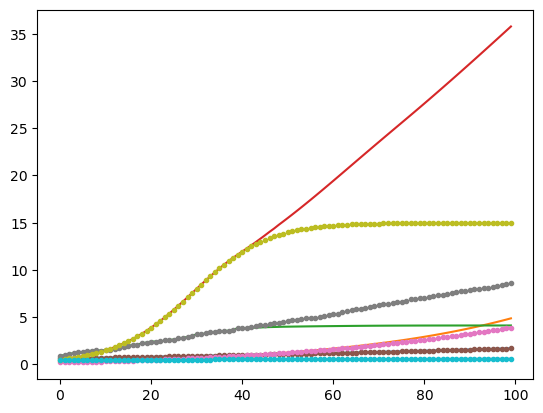

In [41]:
inexces = np.random.randint(0, test_episodes.shape[0], size=5)
plt.plot(learner.predict(test_episodes[inexces,:context_window], num_periods=100-context_window).T)
plt.plot(test_episodes[inexces, ].T, '.')

np.save('degradation_episodes.npy', test_episodes[inexces,:context_window])

In [23]:
class TimeSeriesDatasetRaw(torch.utils.data.Dataset):
    def __init__(self, data, context_window, vocab_size):
        self.data = data
        self.context_window = context_window
        self.vocab_size = vocab_size
        self.n_episodes, self.episode_length = data.shape
        self.samples_per_episode = self.episode_length - context_window
        self.normalizer = WindowNormalizer()
        self.digitizer = UniformDigitizer(vocab_size)
    def __len__(self):
        return self.n_episodes * self.samples_per_episode
    
    def __getitem__(self, idx):
        

        idx_array = np.atleast_1d(idx)
        single_sample = np.isscalar(idx)

        episode_idx = idx_array // self.samples_per_episode
        pos = idx_array % self.samples_per_episode

        # Correct slicing for variable positions
        x = np.stack([self.data[e, p:p+self.context_window] for e, p in zip(episode_idx, pos)])
        y = np.array([self.data[e, p+self.context_window] for e, p in zip(episode_idx, pos)])

        # Convert to tensors
        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float).squeeze()

        if single_sample:
            x_tensor = x_tensor[0]
            y_tensor = y_tensor[0]

        return x_tensor, y_tensor




In [24]:
train_episodes.shape, test_episodes.shape

((9622, 100), (2406, 100))

## next token prediction accuracy

In [25]:
import plotly.express as px
import pandas as pd

In [26]:
dataset_raw= TimeSeriesDatasetRaw(train_episodes, context_window=context_window, vocab_size=vocab_size)
x_batch, y_batch = dataset_raw[range(5_000)]


print(x_batch.shape)

y_predict = learner.predict(x_batch, num_periods=1)[:, -1]




df=pd.DataFrame([y_batch, y_predict]).T
df.columns = ['True Value', 'Predicted Value']
fig = px.line(df, labels={ 'x':['Predicted Value','Predicted Value']}, title='Train data - Next Token Prediction Accuracy')
fig.show()

torch.Size([5000, 40])


does the plot above means we need a bit of regularization, it seems we are fitting to noise??

we are also overfitting to the near-zero scienarios, most of which are paris episodes??!


Text(0.5, 1.0, 'Train data - Next Token Prediction Accuracy')

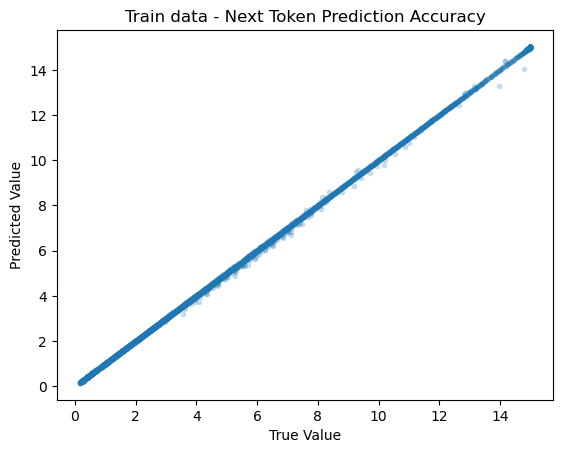

In [27]:
plt.plot(y_batch, y_predict, '.', alpha=0.2)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Train data - Next Token Prediction Accuracy')

In [28]:
dataset_raw= TimeSeriesDatasetRaw(test_episodes, context_window=context_window, vocab_size=vocab_size)
x_batch, y_batch = dataset_raw[range(5_000)]


print(x_batch.shape)

y_predict = learner.predict(x_batch, num_periods=1)[:, -1]


df=pd.DataFrame([y_batch, y_predict]).T
df.columns = ['True Value', 'Predicted Value']
fig = px.line(df, labels={ 'x':['Predicted Value','Predicted Value']}, title='Test data - Next Token Prediction Accuracy')
fig.show()

torch.Size([5000, 40])


Text(0, 0.5, 'Predicted Value')

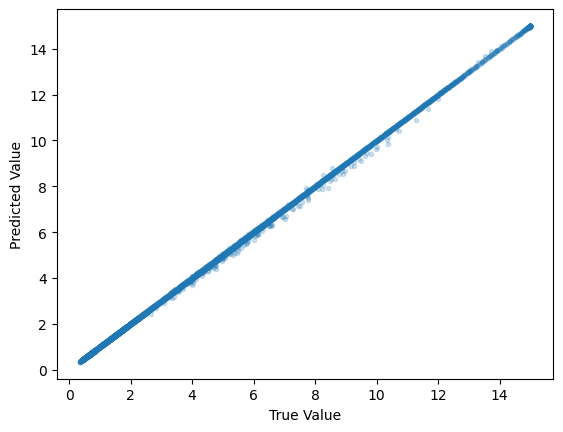

In [29]:
plt.plot(y_batch, y_predict, '.', alpha=0.2)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

# test model loading from local file

In [30]:
from safetensors.torch import load_model
import json
with open("degradation_transformer_model_config.json", "rb") as f:
    model_params=json.load(f)

model1 = DegradationTransformer(vocab_size=model_params['vocab_size'], 
                                context_window=model_params['context_window'], 
                               embedding_dim=model_params['embedding_dim'], 
                               num_heads=model_params['num_heads'],
                                 num_blocks=model_params['num_blocks'])
load_model(model1, "degradation_transformer_model.safetensors")
model1.eval()
learner1 = Learner(model1, optim=None, loss_func=None, 
                  train_loader=None, test_loader=None, cbs=[])

y_predict = learner1.predict(x_batch, num_periods=1)[:, -1]


df=pd.DataFrame([y_batch, y_predict]).T
df.columns = ['True Value', 'Predicted Value']
fig = px.line(df, labels={ 'x':['Predicted Value','Predicted Value']}, title='Test data - Next Token Prediction Accuracy')
fig.show()

In [31]:
learner1.predict(np.arange(30), num_periods=10)

array([[ 0.      ,  1.      ,  2.      ,  3.      ,  4.      ,  5.      ,
         6.      ,  7.      ,  8.      ,  9.      , 10.      , 11.      ,
        12.      , 13.      , 14.      , 15.      , 16.      , 17.      ,
        18.      , 19.      , 20.      , 21.      , 22.      , 23.      ,
        24.      , 25.      , 26.      , 27.      , 28.      , 29.      ,
        29.841   , 30.288614, 31.166985, 32.070827, 33.00088 , 33.95791 ,
        34.942688, 35.956024, 36.99875 , 38.071712]], dtype=float32)

# test model loading from hf

this could be a differnet model than what we train here before pushing code to github

In [32]:
from huggingface_hub import hf_hub_download
file_path = hf_hub_download(
    repo_id="smasadzadeh/degradation-transformer",
    filename="degradation_transformer_model.safetensors"
)

config_file_path = hf_hub_download(
    repo_id="smasadzadeh/degradation-transformer",
    filename="degradation_transformer_model_config.json"
)



model_params = json.load(open(config_file_path, "rb"))
# import DegradationTransformer class from utils_file_path

model2 = DegradationTransformer(vocab_size=model_params['vocab_size'], 
                                context_window=model_params['context_window'], 
                               embedding_dim=model_params['embedding_dim'], 
                               num_heads=model_params['num_heads'],
                                 num_blocks=model_params['num_blocks'])
load_model(model2, file_path)


learner2 = Learner(model2, optim=None, loss_func=None, 
                  train_loader=None, test_loader=None, cbs=[])

y_predict = learner2.predict(x_batch, num_periods=1)[:, -1]



In [33]:
file_path

'/Users/Mohammad/.cache/huggingface/hub/models--smasadzadeh--degradation-transformer/snapshots/fcd88142f4a5e83a0812ec38570919881a44dbe6/degradation_transformer_model.safetensors'

In [34]:

df=pd.DataFrame([y_batch, y_predict]).T
df.columns = ['True Value', 'Predicted Value']
fig = px.line(df, labels={ 'x':['Predicted Value','Predicted Value']}, title='Test data - Next Token Prediction Accuracy')
fig.show()